In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as scp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/poker-rule-induction/test.csv.zip
/kaggle/input/poker-rule-induction/sampleSubmission.csv.zip
/kaggle/input/poker-rule-induction/train.csv.zip


In [ ]:
train_data = pd.read_csv("/kaggle/input/poker-rule-induction/train.csv.zip")
train_data.head()




,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [ ]:
test_data = pd.read_csv("/kaggle/input/poker-rule-induction/test.csv.zip")
test_data.head()

,id,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5
0,1,1,10,2,2,3,3,3,8,1,1
1,2,2,13,3,5,3,7,4,6,1,4
2,3,1,3,1,11,2,8,2,1,2,4
3,4,1,6,3,3,4,7,1,8,3,11
4,5,2,10,3,4,1,6,2,12,2,6


In [ ]:
df = train_data
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


#S1 “Suit of card #1”
#C1 “Rank of card #1”
#Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}
#Numerical (1-13) representing (Ace, 2, 3, .. , Queen, King)""" 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25010 entries, 0 to 25009
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      25010 non-null  int64
 1   C1      25010 non-null  int64
 2   S2      25010 non-null  int64
 3   C2      25010 non-null  int64
 4   S3      25010 non-null  int64
 5   C3      25010 non-null  int64
 6   S4      25010 non-null  int64
 7   C4      25010 non-null  int64
 8   S5      25010 non-null  int64
 9   C5      25010 non-null  int64
 10  hand    25010 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [ ]:
df.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


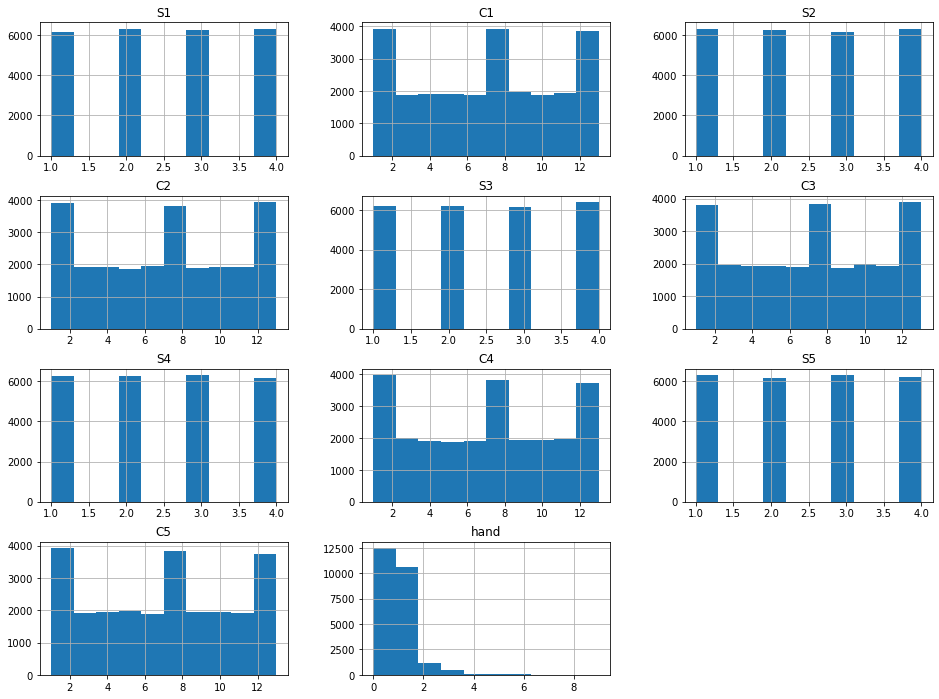

In [ ]:
df.hist(figsize = (16,12));

In [ ]:
df['hand'].value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: hand, dtype: int64

# Func

In [ ]:
def preproc(df):
    df['min-flush'] = (df['S1']==df['S2'])&(df['S2']==df['S3'])&(df['S3']==df['S4'])&(df['S4']==df['S5'])
    a1 = df[['C1', 'C2', 'C3', 'C4', 'C5']].min(axis = 1)
    b1 = 5*a1 + 10
    a2 = df[['C1', 'C2', 'C3', 'C4', 'C5']].max(axis = 1).apply(scp.math.factorial)
    b2 = (df[['C1', 'C2', 'C3', 'C4', 'C5']].min(axis = 1) -1 ).apply(scp.math.factorial)
    c = a2/b2
    df['min-straight'] = ((df['C1']*df['C2']*df['C3']*df['C4']*df['C5'] == c) & (df['C1']+df['C2']+df['C3']+df['C4']+df['C5'] == b1)) | ( (df[['C1', 'C2', 'C3', 'C4', 'C5']].min(axis = 1) == 1) & (df['C1']*df['C2']*df['C3']*df['C4']*df['C5'] == 17160))
    df['min - straight flush'] = df['min-flush'] & df['min-straight']
    df['RF'] = df[df['min - straight flush']==True][['C1', 'C2', 'C3','C4', 'C5']].sum(axis =1) == 47
    df['RF'] = df['RF'].fillna(False)
    df['straight flush'] = (df['min - straight flush'] ==True) & (df['RF'] ==False)
    df['straight flush'] = df['straight flush'].fillna(False)
    df = df.drop('min - straight flush', axis = 1)
    df['flush'] = (df['straight flush'] == False) & (df['min-flush'] ==True) & (df['RF'] ==False)
    df['straight'] = (df['straight flush'] == False) & (df['min-straight'] ==True) & (df['RF'] ==False)
    df = df.drop('min-straight', axis = 1)
    df = df.drop('min-flush', axis = 1)
    df['flush'] = df['flush'].fillna(False)
    df['straight'] = df['straight'].fillna(False)
    df['Nothing in hand'] = (df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 5) & (df['straight'] ==False) & (df['flush'] == False) & (df['RF'] == False)& (df['straight flush'] == False) 
    df['Nothing in hand'] = df['Nothing in hand'].fillna(False)
    df['One pair'] = (df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 4)
    df['One pair'] = df['One pair'].fillna(False)
    df['Four of a kind or Full house'] = df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 2
    df['Two pairs or Three of a kind'] = df[['C1', 'C2', 'C3', 'C4', 'C5']].nunique(axis =1) == 3
    df['Four of a kind or Full house'] = df['Four of a kind or Full house'].fillna(False)
    df['Two pairs or Three of a kind'] = df['Two pairs or Three of a kind'].fillna(False)
    dff = np.array(df[['C1', 'C2', 'C3', 'C4', 'C5']])
    a = []
    for i in range(dff.shape[0]):
        u, v  = np.unique(dff[i], return_counts=True)
        a.append(4 in v)
    df['Four of a kind'] = np.array(a)
    df['Full house'] = (df['Four of a kind']==False) & (df['Four of a kind or Full house'] ==True)
    df = df.drop('Four of a kind or Full house', axis =1)
    a = []
    for i in range(dff.shape[0]):
        u, v  = np.unique(dff[i], return_counts=True)
        a.append(set(v) == set([1,1,3]))
    df['Three of a kind'] = np.array(a)
    df['Two pairs'] = (df['Three of a kind']==False) & (df['Two pairs or Three of a kind'] ==True)
    df = df.drop('Two pairs or Three of a kind', axis =1)
    df = df.drop(['S1', 'S2','S3','S4','S5','C1','C2','C3','C4','C5'], axis = 1)
    return df

In [ ]:
df.head(15)



,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0
5,2,5,1,5,2,13,2,3,3,13,2
6,3,10,4,6,1,4,2,13,4,5,0
7,4,10,3,1,2,13,4,2,4,7,0
8,3,2,4,10,3,3,4,4,1,9,0
9,2,7,3,8,4,8,2,13,2,12,1


In [ ]:
df = preproc(df)

In [ ]:
df.head(15)

,hand,RF,straight flush,flush,straight,Nothing in hand,One pair,Four of a kind,Full house,Three of a kind,Two pairs
0,0,False,False,False,False,True,False,False,False,False,False
1,0,False,False,False,False,True,False,False,False,False,False
2,2,False,False,False,False,False,False,False,False,False,True
3,3,False,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,False,False,False,False
5,2,False,False,False,False,False,False,False,False,False,True
6,0,False,False,False,False,True,False,False,False,False,False
7,0,False,False,False,False,True,False,False,False,False,False
8,0,False,False,False,False,True,False,False,False,False,False
9,1,False,False,False,False,False,True,False,False,False,False


In [ ]:
x = df.drop('hand', axis =1)
y = df['hand']
x = np.array(x).astype(int)


Random Forest Classifier

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)
x_test = test_data
x_test = x_test.drop('id', axis = 1)
x_test = preproc(x_test)


In [ ]:
x_test = np.array(x_test).astype(int)
predictions = model.predict(x_test).astype(int)
output = pd.DataFrame({'id': test_data.id, 'hand': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,id,hand
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
999995,999996,1
999996,999997,1
999997,999998,1
999998,999999,0
